In [1]:
import matplotlib.pyplot as plt
import numpy as np
import random as rng
import math
import datetime as time

In [4]:
def parabolaIter(a,x,t) :
    output = []
    for i in range(t) :
        output.append(i * math.pow(x, 2))
    return output

def calcParabola(f, x) :
    return 1 / 4 * f * math.pow(x - 1, 2)

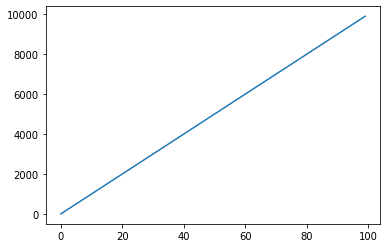

In [6]:
fig_1, axis_1 = plt.subplots()
axis_1.plot(parabolaIter(1,10, 100))

In [137]:
class Item :
    name = ""
    ec = 0
    per = ""
    multi = 0
    
    def __init__(self, name, ec, per, multi=1) :
        self.name = name
        self.ec = ec
        self.per = per
        self.multi = multi
        
    def ToString(self) :
        return f"{self.name} : {self.ec} Per {self.per} , Count : {self.multi}"

class Battery :
    name = ""
    ec = 0
    multi = 0
    
    def __init__(self, name, ec, multi=1) :
        self.name = name
        self.ec = ec
        self.multi = multi
        
    def ToString(self) :
        return f"{self.name} : Cap : {self.ec} , Count : {self.multi}"
        
class Module :
    name = ""
    prod = None
    draw = None
    battery = None
    multi = 0
    
    def __init__(self, name, ecDraw=0, ecBat=0, drawPer="sec", multi=1, ecProd=0, prodPer="sec") :
        self.name = name
        self.multi = multi
        self.prod = Item(name + " src", ecProd, prodPer, multi)
        self.draw = Item(name + " load", ecDraw, drawPer, multi)
        self.battery = Battery(name + " battery", ecBat, multi)
        
    def ToString(self) :
        return f"{self.draw.ToString()} | {self.battery.ToString()} | {self.prod.ToString()}"
        
class PowerCalculator :
    name = ""
    production = []
    consumption = []
    batteryCapacity = []
    modules = []
    
    productionTotal = 0
    consumptionTotal = 0
    batteryCapTotal = 0
    
    chargeRate = 0
    chargeTime_sec = 0
    chargeTime_time = datetime
    
    def __init__(self, name) :
        self.clear()
        self.name = name
        
    def addNewItem(self, name, ec, t="", per="", multi=1) :
        calcEc = self.calcSeconds(ec, per)
        
        if t == "p" :
            temp = Item(name, calcEc, "sec", multi)
            self.production.append(temp)
        elif t == "c" :
            temp = Item(name, calcEc, "sec", multi)
            self.consumption.append(temp)
        elif t == "b" :
            temp = Battery(name, ec, multi)
            self.batteryCapacity.append(temp)
            
    def addNewModule(self, name, ecDraw, ecBat, per, multi=1) :
        calcEc = self.calcSeconds(ecDraw, per)
        self.modules.append(Module(name, calcEc, ecBat, per, multi))
            
    def calculate(self):
        self.calcTotals()
        self.calcChargeRate()
        self.calcChargeTime()
    
    def calcTotals(self) :
        for i in self.production :
            self.productionTotal += i.ec * i.multi
        for i in self.consumption :
            self.consumptionTotal += i.ec * i.multi
        for i in self.batteryCapacity :
            self.batteryCapTotal += i.ec * i.multi
        for i in self.modules :
            self.productionTotal += i.prod.ec * i.multi
            self.consumptionTotal += i.draw.ec * i.multi
            self.batteryCapTotal += i.battery.ec * i.multi
        
    def calcChargeRate(self) :
        self.chargeRate = self.productionTotal - self.consumptionTotal
        
    def calcChargeTime(self) :
        if self.chargeRate != 0 :
            self.chargeTime_sec = self.batteryCapTotal / self.chargeRate
        else :
            self.chargeTime_sec = 0
        
    def calcSeconds(self, val, time) :
        if time == "min" :
            return val / 60
        elif time == "hr" :
            return val / (60 * 60)
        else :
            return val
        
    def printAll(self) :
        print(f"Name : {self.name}")
        
        print("\nTotals :")
        print(f"Produced : {round(self.productionTotal, 4)} /sec")
        print(f"consumed : {round(self.consumptionTotal, 4)} /sec")
        print(f"Battery Cap : {round(self.batteryCapTotal, 4)} ec")
        print(f"Charge Rate : {round(self.chargeRate, 4)} /sec")
        print(f"Charge Time : {round(self.chargeTime_sec, 4)} seconds")
        print(f"Charge Time Span : {self.convertTime()}")
        
        print("\nProduction :")
        for p in self.production :
            print(f"\t{p.ToString()}")
        print("\nConsumption :")
        for c in self.consumption :
            print(f"\t{c.ToString()}")
        print("\nBatteries :")
        for b in self.batteryCapacity :
            print(f"\t{b.ToString()}")
        print("\nModules :")
        for m in self.modules :
            print(f"\t{m.ToString()}")
            
    def convertTime(self) :
        return datetime.timedelta(seconds=self.chargeTime_sec)
            
    def clear(self) :
        self.name = ""
        self.production = []
        self.consumption = []
        self.batteryCapacity = []
        self.modules = []
    
        self.productionTotal = 0
        self.consumptionTotal = 0
        self.batteryCapTotal = 0
    
        self.chargeRate = 0

In [138]:
power = PowerCalculator("test 1")

power.addNewModule("Processor", 0.04, 5, "sec")
power.addNewItem("Command", 3, per="min", t="c")
power.addNewItem("scan Biome", 1, per="sec", t="c")
power.addNewItem("scan Alt", 6, per="min", t="c")
power.addNewItem("small solar", 0.3, per="sec", t="p", multi=5)
power.addNewItem("small Radial", 200, t="b", multi=4)

power.calculate()
power.printAll()

#print(power.convertTimes())

Name : test 1

Totals :
Produced : 1.5 /sec
consumed : 1.19 /sec
Battery Cap : 805 ec
Charge Rate : 0.31 /sec
Charge Time : 2596.7742 seconds
Charge Time Span : 0:43:16.774194

Production :
	small solar : 0.3 Per sec , Count : 5

Consumption :
	Command : 0.05 Per sec , Count : 1
	scan Biome : 1 Per sec , Count : 1
	scan Alt : 0.1 Per sec , Count : 1

Batteries :
	small Radial : Cap : 200 , Count : 4

Modules :
	Processor load : 0.04 Per sec , Count : 1 | Processor battery : Cap : 5 , Count : 1 | Processor src : 0 Per sec , Count : 1


In [4]:
production = []
consumption = []
batteryCapacity = []

def addProducer(ec, per, multi=1) :
    production.append(removeTime(ec, per) * multi)

def addConsumer(ec, per, multi=1) :
    consumption.append(removeTime(ec, per) * multi)
        
def removeTime(val, time) :
    if time == "min" :
        return val / 60
    elif time == "hr" :
        return val / (60 * 60)
    else :
        return val

def addBattery(ec) :
    batteryCapacity.append(ec)

In [9]:
addProducer(0.3,"sec", 4)
addConsumer(1, "sec")
addConsumer(6, "min")

In [10]:
print(production)
print(consumption)

[1.2, 1.2]
[1, 1, 0.1]


0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0


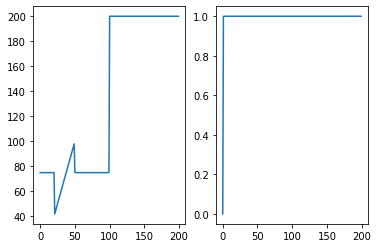

In [84]:
dt = 0.1
olderr = 0
def derive(e, t) :
    if t != 0 :
        #return dt / (e * t)
        return dt / (dt * e)
    else :
        return 0
    
def derFormula(e, preve, t, prevt) :
    #return dt * (t * (e + dt) - (t * (dt * e))) / dt
    de = (e - preve) / (t - prevt)
    dt = t - prevt
    return simpleFilter(de, dt)

# y[i] = α * x[i] + (1-α) * y[i-1]
# y = α * x + (1-α) * (y - dt)

def simpleFilter(de, dt) :
    #return dt / (de + dt)
    return de * dt + (1 - de) * dt
#     return 1 / 1 + (math.sqrt(de * dt))
    
def myDerive(e, olde, t) :
    output = 0
    if t != 0 :
        output = e - olde
        print(f"e {e} , old {olde}")
        #olderr = e
    return output
    
reference = []
error = []
def generate(leng = 200) :
    err = 0
    for i in range(leng) :
        tar = i
        if i < 50 and i > 20:
            tar += i
        elif i < 100 :
            tar = 75
        else :
            tar = 200
        reference.append(tar)
        if i > 0 :
            err = derFormula(reference[i], reference[i - 1], i, i - 1)
        print(err)
        #olderr = err
        error.append(err)

generate()

fig_2, (axis_1, axis_2) = plt.subplots(1,2, sharey='col')
axis_1.plot(range(len(reference)), reference)
axis_2.plot(range(len(error)), error)